<a href="https://colab.research.google.com/github/OlegMukminov/desktop-tutorial/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import statsmodels.stats.weightstats as ssw
from scipy.stats import t
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [4]:
# ваш код тут
expon_rv = sts.expon()
sample = expon_rv.rvs(100)
sample
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
#cosine_rv = sts.cosine()
#sample = cosine_rv.rvs(100)
#sample

array([2.76695754, 0.05356421, 2.34067711, 0.53796164, 1.9602802 ,
       0.12306545, 0.48748772, 1.80495104, 0.57879349, 0.79047833,
       0.22568459, 2.61397428, 0.39665214, 0.69770004, 1.39640787,
       0.4266162 , 0.46845782, 1.23864817, 0.13398542, 1.68117549,
       2.72547224, 0.57461543, 0.26927846, 0.15255318, 0.20997146,
       0.13649514, 0.01306002, 0.47441343, 0.92078207, 0.05941768,
       0.53910727, 1.65662059, 0.05145695, 1.957706  , 0.38627337,
       0.30694494, 1.39543984, 0.89119829, 1.397332  , 0.16358042,
       1.99260791, 0.20888611, 2.03605047, 0.53945572, 1.0752174 ,
       0.50648789, 2.21489654, 0.80271131, 0.98201916, 0.4412481 ,
       1.99673594, 2.42295583, 4.16316419, 0.30745298, 0.2627945 ,
       0.37413888, 1.11147343, 0.24847907, 0.7848815 , 0.354696  ,
       0.31194542, 0.28760308, 0.39118461, 2.21790692, 0.08063788,
       0.15505554, 0.64157267, 0.01641819, 1.21227554, 1.54350031,
       0.18104332, 0.37078902, 0.28090969, 3.92804026, 1.07615

In [5]:
sample.dtype

dtype('float64')

In [6]:
#real_mean = cosine_rv.mean() # настоящее среднее случайной величины
real_mean = expon_rv.mean()

In [7]:
#real_var = cosine_rv.var() # настоящая дисперсия случайной величины
real_var = expon_rv.var()

### Постройте гистограмму выборки и теоретическую плотность распределения

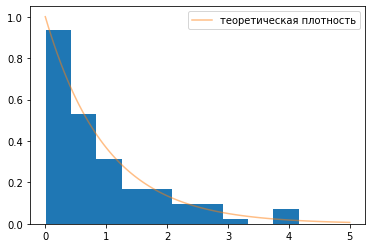

In [8]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(0,5,100)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()
#plt.hist(sample, density=True)
#x = np.linspace(-4,4,100)
#pdf = cosine_rv.pdf(x)
#plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
#plt.legend()

In [10]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.9365258292901752
0.8566210673653372


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [11]:
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(10000):
    means.append(np.mean(expon_rv.rvs(N)))

(array([0.03172279, 0.02379209, 0.0079307 , 0.0158614 , 0.04758419,
        0.12689117, 0.18240605, 0.27757442, 0.39653489, 0.46791117,
        0.76927769, 0.84065397, 1.13408979, 1.32442654, 1.64958515,
        2.00646656, 2.29197168, 2.5774768 , 2.92642751, 3.05331867,
        3.56881403, 3.64812101, 3.56881403, 4.22706195, 3.79880427,
        4.02879451, 3.53709124, 3.55295264, 3.75122008, 3.27537821,
        3.01366518, 2.85505123, 2.50610052, 2.2285261 , 2.10956563,
        1.68923864, 1.62579306, 1.23718886, 0.91996095, 0.86444607,
        0.71376281, 0.45998048, 0.55514885, 0.34895071, 0.25378233,
        0.19826745, 0.13482186, 0.11896047, 0.07137628, 0.09516837,
        0.02379209, 0.04758419, 0.04758419, 0.04758419, 0.        ,
        0.0158614 , 0.        , 0.0079307 , 0.        , 0.0079307 ]),
 array([0.67810281, 0.69071204, 0.70332127, 0.71593051, 0.72853974,
        0.74114897, 0.7537582 , 0.76636743, 0.77897666, 0.79158589,
        0.80419512, 0.81680435, 0.82941358, 0.

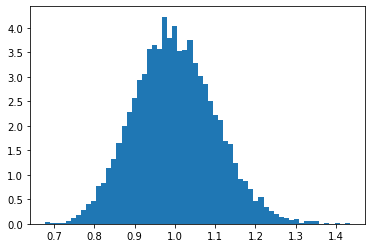

In [12]:
# ваш код тут
plt.hist(means, density=True, bins='auto')

[]

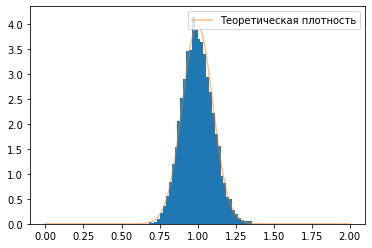

In [13]:
norm_rv = sts.norm(loc=expon_rv.mean(), scale=expon_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(0,2, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

для выбранного распределения апроксимация распределения выборочного среднего работает хорошо

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [3]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
df1 = df[['total day calls', 'churn']]
series_true = df1[df1['churn']==1]['total day calls']
series_false = df1[df1['churn']==0]['total day calls']

[]

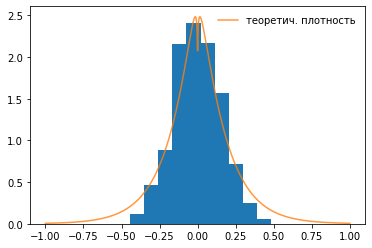

In [5]:
# распределение dgamma: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dgamma.html#scipy.stats.dgamma
a = 1.1
dgamma_rv = sts.dgamma(a)
# Generate random numbers
dgamma_sample = dgamma_rv.rvs(1000)
# dgamma_sample
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(dgamma_rv.rvs(N)))

means = np.array(means).astype(np.float32)
real_dgamma_rv = sts.dgamma(a, loc=dgamma_rv.mean(), scale=dgamma_rv.std() / np.sqrt(N))
plt.hist(means, density=True,) # bins=40)
x = np.linspace(-1,1, 1000)
pdf = real_dgamma_rv.pdf(x)
plt.plot(x, pdf, label='теоретич. плотность', alpha=0.8)
plt.legend(loc='upper right', frameon=False)
plt.plot()

In [12]:
# ваш код тут

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия(Для TRUE): [{}, {}] ".format(
    #np.mean(data1) - 2 * dgamma_rv.std() / np.sqrt(N), np.mean(data1) + 2 * dgamma_rv.std() / np.sqrt(N)
    series_true.mean()-series_true.std()*(np.abs(t.ppf((1-0.95)/2,len(x)-1 )))/np.sqrt(len(x)), series_true.mean()+series_true.std()*(np.abs(t.ppf((1-0.95)/2,len(x)-1 ))/np.sqrt(len(x))) 
))
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия(Для FALSE): [{}, {}] ".format(
    #np.mean(data1) - 2 * dgamma_rv.std() / np.sqrt(N), np.mean(data1) + 2 * dgamma_rv.std() / np.sqrt(N)
    series_false.mean()-series_false.std()*(np.abs(t.ppf((1-0.95)/2,len(x)-1 )))/np.sqrt(len(x)), series_false.mean()+series_false.std()*(np.abs(t.ppf((1-0.95)/2,len(x)-1 ))/np.sqrt(len(x))) 
))

print("\n\nДоверительный интервал для среднего по цпт интервальная оценка (для TRUE): {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(series_true), 
                      scale=np.std(series_true, ddof=1)/np.sqrt(N)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт интервальная оценка (Для FALSE): {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(series_false), 
                      scale=np.std(series_false, ddof=1)/np.sqrt(N)) # alternative 'two-sided' only
))

print("\n\nДоверительный интервал для среднего по цпт методом _zconfint_generic (для TRUE): {} ".format(
    ssw._zconfint_generic(np.mean(series_true),  np.std(series_true, ddof=1), alpha=0.95, alternative='two-sided')
))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic (Для FALSE): {} ".format(
    ssw._zconfint_generic(np.mean(series_false),  np.std(series_false, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия(Для TRUE): [99.99612043717927, 102.67468701623689] 
Доверительный интервал для среднего по цпт, если нам известна дисперсия(Для FALSE): [99.0544033247517, 101.51191246472199] 


Доверительный интервал для среднего по цпт интервальная оценка (для TRUE): (97.10534924261738, 105.56545821079878) 
Доверительный интервал для среднего по цпт интервальная оценка (Для FALSE): (96.40220244696052, 104.16411334251318) 


Доверительный интервал для среднего по цпт методом _zconfint_generic (для TRUE): (99.98204678079553, 102.68876067262063) 
Доверительный интервал для среднего по цпт методом _zconfint_generic (Для FALSE): (99.04149114274126, 101.52482464673243) 
